# Preparando ambiente

In [1]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!mount -o remount,exec /content
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree

mount: /content: mount point not mounted or bad option.
./configure: line 6204: /usr/bin/file: No such file or directory
/content/spatialindex-src-1.8.5/missing: Unknown `--is-lightweight' option
Try `/content/spatialindex-src-1.8.5/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
src/tools/.libs/libtools.a(Tools.o): In function `Tools::TemporaryFile::TemporaryFile()':
Tools.cc:(.text+0x3d35): warning: the use of `mktemp' is dangerous, better use `mkstemp' or `mkdtemp'
ar: `u' modifier ignored since `D' is the default (see `U')

In [2]:
!pip install --upgrade geopandas
!pip install --upgrade rtree
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 962kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 271kB/s 
     |████████████████████████████████| 10.9MB 30.0MB/s 
Requirement already up-to-date: rtree in /usr/local/lib/python3.6/dist-packages (0.9.4)
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=ef5b6801d1af649eafcb6bb44b9a66c450c2f350abd5ec7e0b15cbbd7c5b2be9
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [4]:
PATH = '/content/drive/My Drive/Colab datasets/izap/'
VAZFILE = '2406_JQ_Igam_UFV_reg_vazao_lin.shp'
OTTOFILE = '0102_jq_otto_bacia_pol.shp'
CSV = 'OutorgasFelicioDosSantos.csv'
EPSG = 4326

# Delimitação da bacia


In [5]:
CODRIO = "7582998"

In [6]:
hidrico = geopandas.read_file(PATH+VAZFILE, encoding='ISO-8859-1')
hidrico.crs = 'EPSG:'+str(EPSG)
hidricoInteresse = hidrico[hidrico['cocursodag'].str.contains(CODRIO)]
  
hidricoInteresse.loc[:,'q7_10'] = [x.replace(',', '.') for x in hidricoInteresse['q7_10']]
hidricoInteresse.loc[:,'q7_10'] = hidricoInteresse['q7_10'].astype(float)

hidricoInteresse.loc[:,'qmld_'] = [x.replace(',', '.') for x in hidricoInteresse['qmld_']]
hidricoInteresse.loc[:,'qmld_'] = hidricoInteresse['qmld_'].astype(float)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


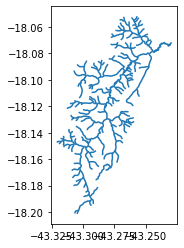

In [7]:
hidricoInteresse.plot()
#plt.savefig('/home/gorgens/Github/i_zap/01_delimitacao/hidrico.png')

In [8]:
otto = geopandas.read_file(PATH+OTTOFILE)
otto.crs = 'EPSG:'+str(EPSG)

ottoInteresse = otto[otto['cocursodag'].str.contains('^'+CODRIO)]


ottoClean = ottoInteresse[['nunivotto3', 'geometry']]
bacia = ottoClean.dissolve(by='nunivotto3')

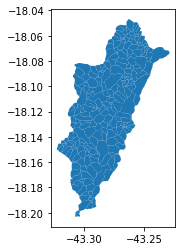

In [9]:
ottoInteresse.plot()
#plt.savefig('/home/gorgens/Github/i_zap/01_delimitacao/otto.png')

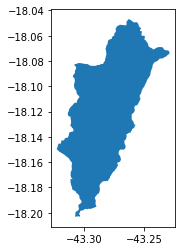

In [10]:
bacia.plot()
#plt.savefig('/home/gorgens/Github/i_zap/01_delimitacao/bacia.png')

In [11]:
hidricoInteresse.to_file(PATH+"zapRibSantana.gpkg", layer='redeHidro', driver="GPKG")
ottoInteresse.to_file(PATH+"zapRibSantana.gpkg", layer='ottobacias', driver="GPKG")
bacia.to_file(PATH+"zapRibSantana.gpkg", layer='bacia', driver="GPKG")